# PROBLEM 1: Aminer : basic dataset analysis


## Preprocessing


In [74]:
import pandas as pd
import numpy as np

file = "acm.txt"

title, author, year, venue, id, abstract, reference_id = [], [], [], [], [], [], []
reference = []

with open(input_file, "r") as file:
    for line in file:
        line = line.strip()
        if line == "":
            reference_id.append(reference)
            if len(year) < len(id):
                year.append(None)
            if len(venue) < len(id):
                venue.append(None)
            if len(abstract) < len(id):
                abstract.append(None)
            if len(author) < len(id):
                author.append([])
            if len(title) < len(id):
                title.append(None)

            if (
                len(year) != len(venue)
                or len(venue) != len(year)
                or len(year) != len(id)
                or len(id) != len(abstract)
                or len(abstract) != len(author)
            ):
                break
            reference = []

        if line.startswith("#*"):
            title.append(line[2:].strip())
        elif line.startswith("#@"):
            auth = line[2:].strip().split(",")
            author.append(auth)
        elif line.startswith("#t"):
            year.append(line[2:].strip())
        elif line.startswith("#c"):
            venue.append(line[2:].strip())
        elif line.startswith("#index"):
            id.append(line[6:].strip())
        elif line.startswith("#%"):
            reference.append(line[2:].strip())


df = pd.DataFrame({"Title": title, "Year": year, "Venue": venue, "Index": id})

In [92]:
df_auth.nunique()

Index     2233982
Author    1651475
dtype: int64

In [99]:
len(df_auth[df_auth['Author'] == 'Andrea Bracciali'])

22

In [106]:
len(df_auth[df_auth['Author'] == '-'])

4458

In [100]:
result = pd.merge(df_auth, df, on='Index', how='left')
result.head()

,Index,Author,Title,Year,Venue
0,2,Virgil D. Gligor,The verification of the protection mechanisms ...,1984.0,International Journal of Parallel Programming
1,3,M. Gyssens,Another view of functional and multivalued dep...,1984.0,International Journal of Parallel Programming
2,3,J. Paredaens,Another view of functional and multivalued dep...,1984.0,International Journal of Parallel Programming
3,4,Sushil Jajodia,Entity-relationship diagrams which are in BCNF,1984.0,International Journal of Parallel Programming
4,4,Peter A. Ng,Entity-relationship diagrams which are in BCNF,1984.0,International Journal of Parallel Programming


In [104]:
result[result['Author'] == 'Andrea Bracciali']['Title'].unique()

array(['Coordinating interaction patterns', 'Bisimulation by Unification',
       'Security and Dynamic Compositions of Open Systems',
       'Dynamically Adapting the Behaviour of Software Components',
       'Adapting Components with Mismatching Behaviours',
       'A formal approach to component adaptation',
       'A symbolic framework for multi-faceted security protocol analysis',
       'Abduction and legal reasoning',
       'Synapses as stochastic concurrent systems',
       'Control Flow Analysis for Brane Calculi',
       'On Symbolic Semantics for Name-decorated Contexts',
       'A Coordination-based Methodology for Security Protocol Verification',
       'Deducing interactions in partially unspecified biological systems',
       'Expressive models for synaptic plasticity',
       'Modelling non-linear crowd dynamics in bio-PEPA',
       'StochKit-FF: efficient systems biology on multicore architectures',
       'A new framework for knowledge revision of abductive agents th

In [96]:
df.head()

,Title,Year,Venue,Index
0,MOSFET table look-up models for circuit simula...,1984.0,"Integration, the VLSI Journal",1
1,The verification of the protection mechanisms ...,1984.0,International Journal of Parallel Programming,2
2,Another view of functional and multivalued dep...,1984.0,International Journal of Parallel Programming,3
3,Entity-relationship diagrams which are in BCNF,1984.0,International Journal of Parallel Programming,4
4,The computer comes of age,1984.0,The computer comes of age,5


In [90]:
df.tail()

,Title,Year,Venue,Index
2385061,Editorial Board,2016.0,Theoretical Computer Science,2385062
2385062,Linear-time computation of prefix table for we...,2016.0,Theoretical Computer Science,2385063
2385063,A space-efficient alphabet-independent Four-Ru...,2016.0,Theoretical Computer Science,2385064
2385064,Computers in Entertainment (CIE) - Special Iss...,2016.0,Computers in Entertainment (CIE),2385065
2385065,Computers in Entertainment (CIE) - Special Iss...,2016.0,Computers in Entertainment (CIE),2385066


In [11]:
df.head()

,Title,Year,Venue,Index
0,MOSFET table look-up models for circuit simula...,1984,"Integration, the VLSI Journal",1
1,The verification of the protection mechanisms ...,1984,International Journal of Parallel Programming,2
2,Another view of functional and multivalued dep...,1984,International Journal of Parallel Programming,3
3,Entity-relationship diagrams which are in BCNF,1984,International Journal of Parallel Programming,4
4,The computer comes of age,1984,The computer comes of age,5


In [16]:
reference_data = {
    "Index": [],
    "Reference_Id": []
}

for idx, refs in zip(id, reference_id):
    for ref in refs:
        reference_data["Index"].append(idx)
        reference_data["Reference_Id"].append(ref)

df_ref = pd.DataFrame(reference_data)

In [86]:
df.shape

(2385066, 4)

In [93]:
df_auth.nunique()

Index     2233982
Author    1651475
dtype: int64

In [17]:
author_data = {
    "Index": [],
    "Author": []
}

for idx, auths in zip(id, author):
    for auth in auths:
        # cleaned_auth = auth.strip("*†\" ").strip()
        cleaned_auth = auth.replace('"', '').strip("*† ").strip()
        if cleaned_auth == '':
            continue
        author_data["Index"].append(idx)
        author_data["Author"].append(cleaned_auth)

df_auth = pd.DataFrame(author_data)

In [18]:
df_auth.head()

,Index,Author
0,2,Virgil D. Gligor
1,3,M. Gyssens
2,3,J. Paredaens
3,4,Sushil Jajodia
4,4,Peter A. Ng


In [88]:
df['Title'].nunique()

2183550

In [89]:
df_auth['Author'].nunique()

1651475

In [81]:
df_auth[df_auth['Author'] == 'Franco Turini']

,Index,Author
1055,608,Franco Turini
3234,1907,Franco Turini
41438,25053,Franco Turini
115558,68418,Franco Turini
140954,82388,Franco Turini
...,...,...
4403938,1796946,Franco Turini
4910548,1979088,Franco Turini
4985800,2002093,Franco Turini
5233244,2084004,Franco Turini


In [19]:
df_ref.head()

,Index,Reference_Id
0,9,289258
1,9,2135000
2,10,2135000
3,11,289023
4,11,408637


In [94]:
df_auth.shape

(5718609, 2)

In [20]:
df_ref.to_csv('df_ref.csv', index=False)
df.to_csv('df.csv', index=False)
df_auth.to_csv('df_auth.csv', index=False)

In [21]:
df.isnull().sum()

Title      44
Year     8428
Venue     138
Index       0
dtype: int64

In [22]:
df_auth.isnull().sum()

Index     0
Author    0
dtype: int64

In [23]:
df.shape

(2385066, 4)

## A. Compute the number of distinct authors, publication venues, publications, and citations/references


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

df_ref = pd.read_csv('df_ref.csv')
df = pd.read_csv('df.csv')
df_auth = pd.read_csv('df_auth.csv')

In [3]:
df_ref.head()

,Index,Reference_Id
0,9,289258
1,9,2135000
2,10,2135000
3,11,289023
4,11,408637


In [4]:
df_auth.head()

,Index,Author
0,2,Virgil D. Gligor
1,3,M. Gyssens
2,3,J. Paredaens
3,4,Sushil Jajodia
4,4,Peter A. Ng


In [5]:
df_ref.head()

,Index,Reference_Id
0,9,289258
1,9,2135000
2,10,2135000
3,11,289023
4,11,408637


In [6]:
df_non_null = df.dropna()
df_non_null.isnull().sum()

Title    0
Year     0
Venue    0
Index    0
dtype: int64

In [7]:
print("Final answers")
print("Distinct Authors             -", len(df_auth['Author'].unique()))
print("Distinct Publication Venues  -", len(df_non_null['Venue'].unique()))
print("Distinct Publications        -", df.shape[0])
print("Distinct References          -", len(df_ref['Reference_Id'].unique()))

Final answers
Distinct Authors             - 1651476
Distinct Publication Venues  - 273092
Distinct Publications        - 2385066
Distinct References          - 1007495


## B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?


**The accuracy of the numbers**

- There are some publications where there are no author names (e.g. '-' or 'Jr.'). This shows that the number for distinct authors is inaccurate. However, it is obivious that number of publications should be more than the number of distinct author and that can be seen in the numbers (but I am unsure about how much this difference should be).
- For venue we can observe that every year there is a new venue for PKDD. However we don't have a venue listed for year 2003. This may imply that the data for year 2003 might be missing and thus the numbers might be inaccurate.
- In case of the number of distinct publication, it seems accurate because if we check the last index number of the publication in .txt file, we can observe that it is the same number as the number of distinct publications which makes sense and the index is the unique idenfier for each publication (also the index just a iterative number from 1 to last publication thus last index is the number of distinct publication).


In [13]:
df_non_null[df_non_null['Venue'].str.startswith('PKDD')]['Venue'].unique()

array(["PKDD '97 Proceedings of the First European Symposium on Principles of Data Mining and Knowledge Discovery",
       "PKDD '98 Proceedings of the Second European Symposium on Principles of Data Mining and Knowledge Discovery",
       "PKDD '99 Proceedings of the Third European Conference on Principles of Data Mining and Knowledge Discovery",
       "PKDD '00 Proceedings of the 4th European Conference on Principles of Data Mining and Knowledge Discovery",
       "PKDD '01 Proceedings of the 5th European Conference on Principles of Data Mining and Knowledge Discovery",
       "PKDD '02 Proceedings of the 6th European Conference on Principles of Data Mining and Knowledge Discovery",
       "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases",
       'PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases',
       "PKDD'06 Proceedings of the 10th European conf

## C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)


In [14]:
df_auth.head()

,Index,Author
0,2,Virgil D. Gligor
1,3,M. Gyssens
2,3,J. Paredaens
3,4,Sushil Jajodia
4,4,Peter A. Ng


In [15]:
df_auth.shape

(5718609, 2)

In [16]:
auth_count = df_auth.groupby(['Author']).size().reset_index(
    name='Publications_per_auth').sort_values(by='Publications_per_auth', ascending=False)
auth_count

,Author,Publications_per_auth
747295,Jr.,8878
95,-,4458
589445,III,1761
266243,Computer Staff,1560
1370556,Staff,1446
...,...,...
689304,Jian-Fan Dun,1
689302,Jian-Fa Luo,1
689301,Jian-Er Hung,1
689298,Jian-Dong Zhang,1


<Axes: xlabel='Count', ylabel='Publications_per_auth'>

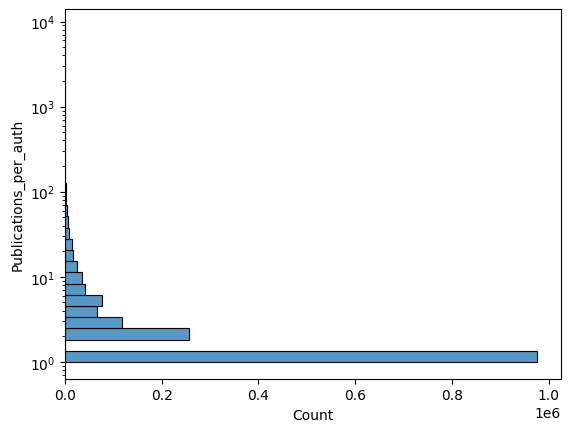

In [17]:
sns.histplot(auth_count, y='Publications_per_auth',
             bins=30, log_scale=(False, True), kde=False)

In [18]:
auth_count['Publications_per_auth'].nunique()

417

## D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.


In [19]:
import numpy as np
author_pub = np.array(auth_count['Publications_per_auth'])

In [20]:
print("Mean               -", author_pub.mean())
print("SD                 -", author_pub.std())
print("First Quartile     -", np.percentile(author_pub, 25))
print("Second Quartile    -", np.percentile(author_pub, 50))
print("Third Quartile     -", np.percentile(author_pub, 75))

Mean               - 3.462726956205816
SD                 - 12.771927958377761
First Quartile     - 1.0
Second Quartile    - 1.0
Third Quartile     - 3.0


- As mean is greater than median(Second Quartile), this tells us that the distribution of the data is right skewed.
- The third quartile is 3 and the standard deviation is 12.77. This implies that the standard deviation is exceeding the values which are greater than 75% of the data (3rd Quartile). This can happen if we have some outlier. From the table we can see the outliers are coming from values such as 'Jr.' or '-' (These might be given because the author names are unkown).


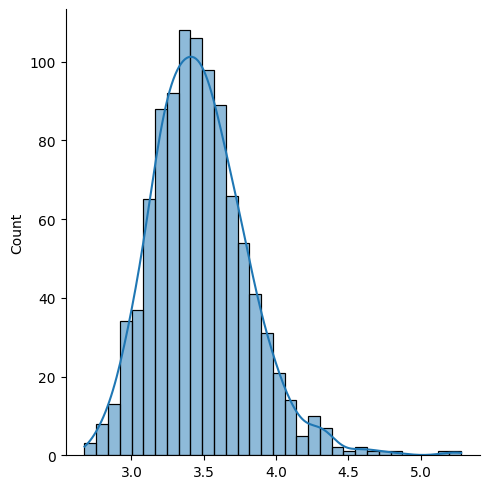

In [21]:
import seaborn as sns
means = []

for i in range(1000):
    sample = np.random.choice(author_pub, size=1000, replace=False)
    means.append(sample.mean())

sns.displot(means, kde=True)

## E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?


In [22]:
venu_count = df.groupby(['Venue']).size().reset_index(
    name='Publications_per_venu').sort_values(by='Publications_per_venu', ascending=False)
venu_count

,Venue,Publications_per_venu
118379,IEEE Transactions on Information Theory,12754
57872,Computer,11621
80108,Discrete Mathematics,10814
54191,Communications of the ACM,10125
118408,IEEE Transactions on Signal Processing,9863
...,...,...
95301,Exploring the Apple IIGS: Programming with Gra...,1
95302,Exploring the Art and Technology of Web Design...,1
95303,Exploring the Basics of Drawing - Book Only,1
95304,Exploring the Basics of Drawing - with CourseM...,1


<Axes: xlabel='Publications_per_venu', ylabel='Count'>

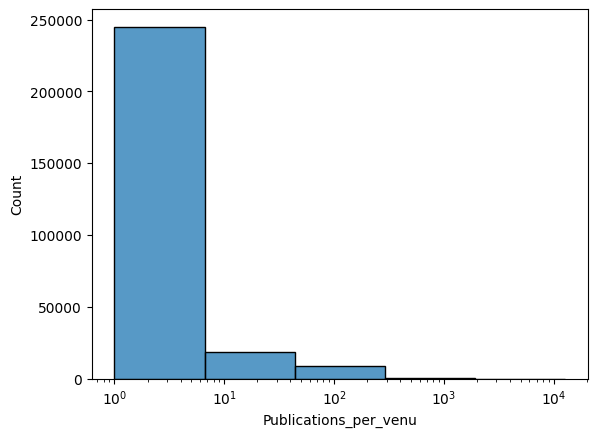

In [23]:
sns.histplot(venu_count['Publications_per_venu'],
             bins=5, log_scale=(True, False), kde=False)

In [24]:
# sns.histplot(data=venu_count, x='Publications_per_venu', y='Venue')

In [25]:
publications_per_venu = np.array(venu_count['Publications_per_venu'])

In [26]:
print("Mean               -", publications_per_venu.mean())
print("SD                 -", publications_per_venu.std())
print("First Quartile     -", np.percentile(publications_per_venu, 25))
print("Second Quartile    -", np.percentile(publications_per_venu, 50))
print("Third Quartile     -", np.percentile(publications_per_venu, 75))

Mean               - 8.725512936837792
SD                 - 106.79602901572888
First Quartile     - 1.0
Second Quartile    - 1.0
Third Quartile     - 1.0


Venue with the largest number of publications is 'IEEE Transactions on Information Theory'


## F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?


In [9]:
df_ref.head()

,Index,Reference_Id
0,9,289258
1,9,2135000
2,10,2135000
3,11,289023
4,11,408637


In [10]:
ref_per_pub = df_ref.groupby(['Index']).size().reset_index(
    name='References_per_pub').sort_values(by='References_per_pub', ascending=False)
ref_per_pub

,Index,References_per_pub
914088,2015217,809
180422,719352,773
440816,1221203,556
669583,1583652,528
534198,1376719,525
...,...,...
604346,1475352,1
604352,1475358,1
604353,1475359,1
604354,1475360,1


<Axes: xlabel='References_per_pub', ylabel='Count'>

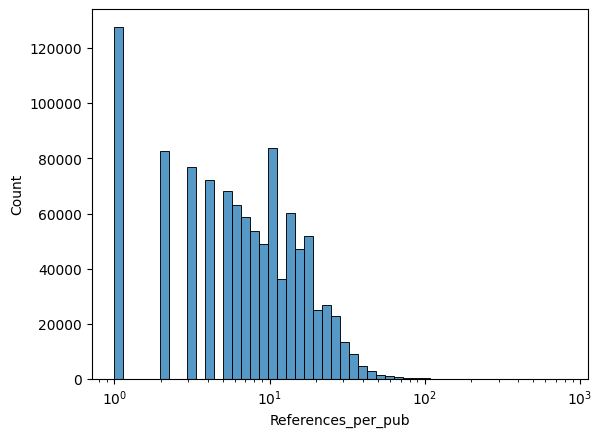

In [11]:
sns.histplot(ref_per_pub['References_per_pub'],
             bins=50, log_scale=(True, False), kde=False)

In [30]:
cit_per_pub = df_ref.groupby(['Reference_Id']).size().reset_index(
    name='Citations_per_pub').sort_values(by='Citations_per_pub', ascending=False)
cit_per_pub

,Reference_Id,Citations_per_pub
994715,2135000,938039
1007493,2381731,82080
195094,408395,8620
182079,369235,6526
85848,190580,5297
...,...,...
759045,1490348,1
759044,1490347,1
362720,734466,1
759042,1490341,1


<Axes: xlabel='Citations_per_pub', ylabel='Count'>

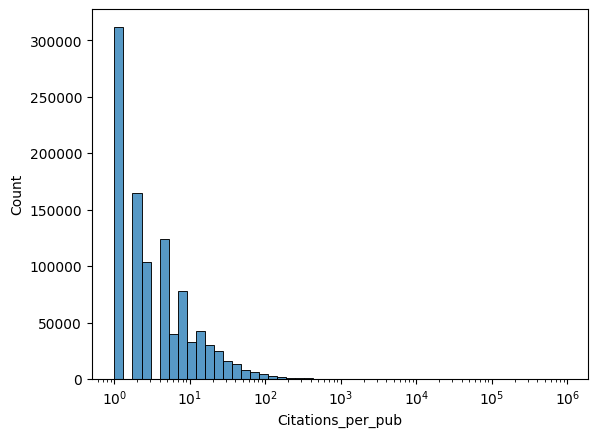

In [101]:
sns.histplot(cit_per_pub['Citations_per_pub'],
             bins=50, log_scale=(True, False), kde=False)
# sns.histplot(cit_per_pub['Citations_per_pub'], bins=50, kde=False)

In [32]:
df.loc[df['Index'] == 2015217, 'Title'].iloc[0]

'Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles'

In [33]:
df.loc[df['Index'] == 2135000, 'Title'].iloc[0]

'INFORMS Journal on Computing'

- Publication with largest number of references is 'Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles'
- Publication with largest number of citations is 'INFORMS Journal on Computing'
- This makes sense because citations are done in multiple papers whereas references are made in single paper, so the number of citations will be larger than the number of references.


## G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results


In [3]:
df

,Title,Year,Venue,Index
0,MOSFET table look-up models for circuit simula...,1984.0,"Integration, the VLSI Journal",1
1,The verification of the protection mechanisms ...,1984.0,International Journal of Parallel Programming,2
2,Another view of functional and multivalued dep...,1984.0,International Journal of Parallel Programming,3
3,Entity-relationship diagrams which are in BCNF,1984.0,International Journal of Parallel Programming,4
4,The computer comes of age,1984.0,The computer comes of age,5
...,...,...,...,...
2385061,Editorial Board,2016.0,Theoretical Computer Science,2385062
2385062,Linear-time computation of prefix table for we...,2016.0,Theoretical Computer Science,2385063
2385063,A space-efficient alphabet-independent Four-Ru...,2016.0,Theoretical Computer Science,2385064
2385064,Computers in Entertainment (CIE) - Special Iss...,2016.0,Computers in Entertainment (CIE),2385065


In [4]:
2381731

2381731

In [5]:
df_ref[df_ref['Reference_Id'] == 1223423]

,Index,Reference_Id
5110067,1424587,1223423
5183396,1433107,1223423
5414518,1474892,1223423
5509403,1486155,1223423
5577108,1493474,1223423
...,...,...
9441280,2191200,1223423
9474438,2201861,1223423
9548226,2299075,1223423
9618441,2370806,1223423


In [35]:
df_ref_merge = pd.merge(df_ref, df, left_on='Reference_Id', right_on='Index')

In [36]:
df_ref_merge

,Index_x,Reference_Id,Title,Year,Venue,Index_y
0,9,289258,Flowshop scheduling with limited temporary sto...,1980.0,Journal of the ACM (JACM),289258
1,191224,289258,Flowshop scheduling with limited temporary sto...,1980.0,Journal of the ACM (JACM),289258
2,285856,289258,Flowshop scheduling with limited temporary sto...,1980.0,Journal of the ACM (JACM),289258
3,289458,289258,Flowshop scheduling with limited temporary sto...,1980.0,Journal of the ACM (JACM),289258
4,790380,289258,Flowshop scheduling with limited temporary sto...,1980.0,Journal of the ACM (JACM),289258
...,...,...,...,...,...,...
10410608,2385039,1915270,Semantics-preserving implementation of multira...,2012.0,Proceedings of the 20th International Conferen...,1915270
10410609,2385039,1779298,On Resource Overbooking in an Unmanned Aerial ...,2012.0,ICCPS '12 Proceedings of the 2012 IEEE/ACM Thi...,1779298
10410610,2385041,2146909,Measurement and interpretation of microbenchma...,2014.0,Proceedings of the 2nd International Workshop ...,2146909
10410611,2385043,2210057,Enhanced Secure Architecture for Joint Action ...,2013.0,IEEE Transactions on Very Large Scale Integrat...,2210057


In [37]:
df_ref_merge.drop('Index_y', axis=1, inplace=True)
df_ref_merge.rename(columns={'Index_x': 'Index'}, inplace=True)

In [38]:
pub_per_venue = df.groupby('Venue').size().reset_index(
    name='Publications_per_venue').sort_values(by='Publications_per_venue', ascending=False)
citaions_per_venue = df_ref_merge.groupby(['Reference_Id']).size().reset_index(
    name='Count').sort_values(by='Count', ascending=False)
citaions_per_venue = df_ref_merge.groupby(['Venue']).size().reset_index(
    name='Count').sort_values(by='Count', ascending=False)

In [10]:
citaions_per_venue[citaions_per_venue['Count'] < 25]

,Venue,Count
46223,Journal of Computational and Applied Mathemati...,24
26287,Dynamic Routing in Telecommunications Networks,24
50568,"Machine Learning and Its Applications, Advance...",24
67515,Proceedings of the fifteenth international wor...,24
50567,Machine Learning and Its Applications,24
...,...,...
47653,Knowledge-based intelligent tracking (expert s...,1
47655,Knowledge-based machine vision system for outd...,1
47656,Knowledge-based management of legacy codes for...,1
47657,Knowledge-based master production scheduler fo...,1


In [39]:
pub_per_venne = df.groupby('Venue').size().reset_index(
    name='pub_per_venue').sort_values(by='pub_per_venue', ascending=False)

In [40]:
pub_per_venne

,Venue,pub_per_venue
118379,IEEE Transactions on Information Theory,12754
57872,Computer,11621
80108,Discrete Mathematics,10814
54191,Communications of the ACM,10125
118408,IEEE Transactions on Signal Processing,9863
...,...,...
95301,Exploring the Apple IIGS: Programming with Gra...,1
95302,Exploring the Art and Technology of Web Design...,1
95303,Exploring the Basics of Drawing - Book Only,1
95304,Exploring the Basics of Drawing - with CourseM...,1


In [41]:
citations_pub = pd.merge(citaions_per_venue, pub_per_venne,
                         left_on='Venue', right_on='Venue')
citations_pub['Impact'] = citations_pub['Count'] / \
    citations_pub['pub_per_venue']
citations_pub

,Venue,Count,pub_per_venue,Impact
0,INFORMS Journal on Computing,942441,1242,758.809179
1,Proceedings of the 19th ACM SIGKDD internation...,410707,202,2033.202970
2,Communications of the ACM,131615,10125,12.999012
3,IEEE Transactions on Pattern Analysis and Mach...,122327,5560,22.001259
4,IJIRR: International Journal of Information Re...,82080,1,82080.000000
...,...,...,...,...
91915,Knowledge-based intelligent tracking (expert s...,1,1,1.000000
91916,Knowledge-based machine vision system for outd...,1,1,1.000000
91917,Knowledge-based management of legacy codes for...,1,1,1.000000
91918,Knowledge-based master production scheduler fo...,1,1,1.000000


In [42]:
citations_pub['Impact'].idxmax()

4

In [43]:
citations_pub.iloc[4]

Venue            IJIRR: International Journal of Information Re...
Count                                                        82080
pub_per_venue                                                    1
Impact                                                     82080.0
Name: 4, dtype: object

In [44]:
citations_pub.iloc[4][0]

'IJIRR: International Journal of Information Retrieval Research.'

<Axes: xlabel='Impact', ylabel='Count'>

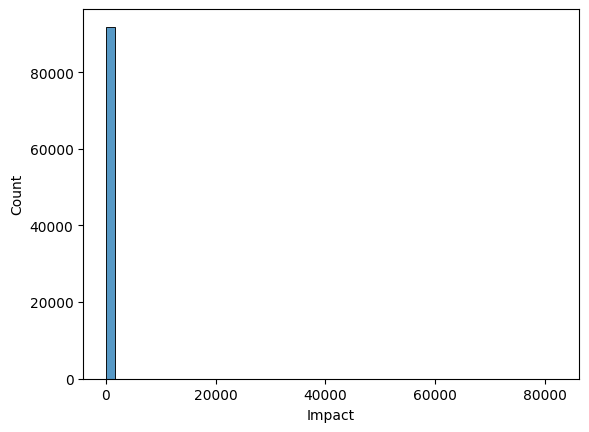

In [45]:
# Without log scale
sns.histplot(citations_pub['Impact'], bins=50, kde=False)

<Axes: xlabel='Impact', ylabel='Count'>

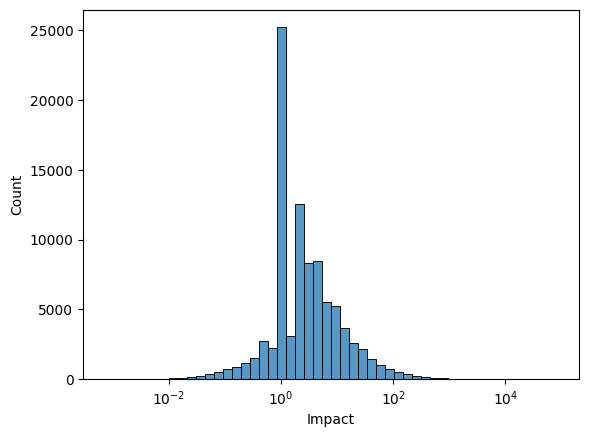

In [46]:
# With log scale
sns.histplot(citations_pub['Impact'], bins=50,
             log_scale=(True, False), kde=False)

In [19]:
print("1000+ ", len(citations_pub[citations_pub['Impact'] > 1000]))
print("100+  ", len(citations_pub[citations_pub['Impact'] > 100]))
print("20+   ", len(citations_pub[citations_pub['Impact'] > 20]))
print("10+   ", len(citations_pub[citations_pub['Impact'] > 10]))
print("5+    ", len(citations_pub[citations_pub['Impact'] > 5]))

1000+  72
100+   1580
20+    7843
10+    14242
5+     24309


## H. What is the venue with the highest apparent impact factor? Do you believe this number?


In [23]:
citations_pub.loc[citations_pub['Impact'].idxmax()]['Venue']

'IJIRR: International Journal of Information Retrieval Research.'

In [24]:
citations_pub.loc[citations_pub['Impact'].idxmax()]

Venue            IJIRR: International Journal of Information Re...
Count                                                        82080
pub_per_venue                                                    1
Impact                                                     82080.0
Name: 4, dtype: object

In [25]:
citations_pub[citations_pub['Impact'] == 82080]

,Venue,Count,pub_per_venue,Impact
4,IJIRR: International Journal of Information Re...,82080,1,82080.0
5,Graphics Interface 1990,82080,1,82080.0
6,PVLDB,82080,1,82080.0
7,AI EDAM,82080,1,82080.0
8,Graz,82080,1,82080.0


- Venue with the highest apparent impact factor is 'IJIRR: International Journal of Information Retrieval Research'
- As per data in the dataset, I can find that for the above 5 venues, I am getting only one publication and 82080 citations for these publications. The reason to get 5 venues with the same 82080 number is that all of these have the same index number (I don't why but the index should be unique as per description of the data) and thus the same number of citations and publications. So as per the data this makes sense to me.


## I. Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?


In [26]:
merge_total_citations_pub_more_than_10 = citations_pub[citations_pub['pub_per_venue'] > 10]
merge_total_citations_pub_more_than_10

,Venue,Count,pub_per_venue,Impact
0,INFORMS Journal on Computing,942441,1242,758.809179
1,Proceedings of the 19th ACM SIGKDD internation...,410707,202,2033.202970
2,Communications of the ACM,131615,10125,12.999012
3,IEEE Transactions on Pattern Analysis and Mach...,122327,5560,22.001259
9,Journal of the ACM (JACM),73720,3016,24.442971
...,...,...,...,...
91776,Kognitive Aspekte der Mensch-Computer-Interakt...,1,17,0.058824
91809,LADC '13 Proceedings of the 2013 Sixth Latin-A...,1,26,0.038462
91822,LSSA'97 Proceedings of the 1997 Workshop on La...,1,12,0.083333
91829,LISA'14 Proceedings of the 28th USENIX confere...,1,17,0.058824


<Axes: xlabel='Impact', ylabel='Count'>

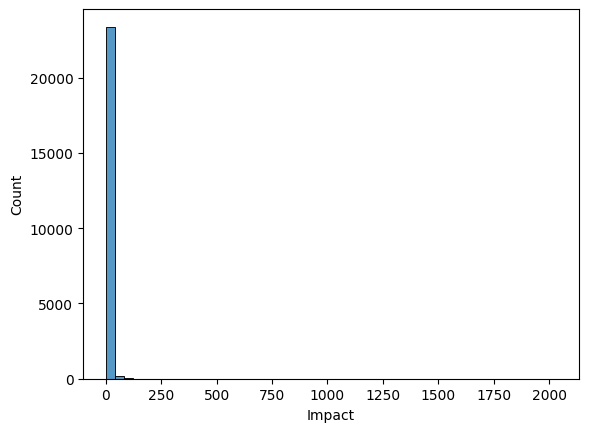

In [27]:
# Without log scale
sns.histplot(
    merge_total_citations_pub_more_than_10['Impact'], bins=50, kde=False)

<Axes: xlabel='Impact', ylabel='Count'>

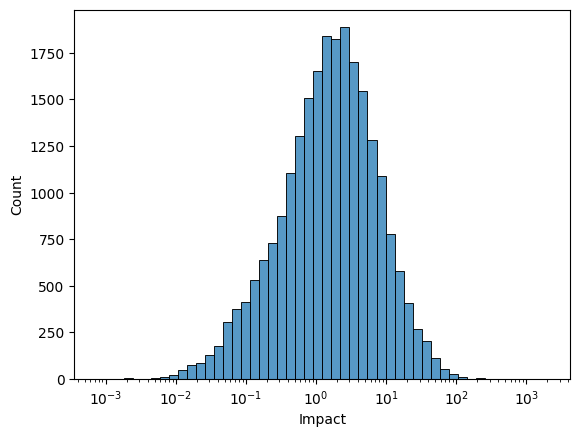

In [28]:
# Without log scale
sns.histplot(merge_total_citations_pub_more_than_10['Impact'], bins=50, log_scale=(
    True, False), kde=False)

The histogram becomes more similar to the normal form.


In [29]:
print("1000+",
      len(merge_total_citations_pub_more_than_10[merge_total_citations_pub_more_than_10['Impact'] > 1000]))
print("100+",
      len(merge_total_citations_pub_more_than_10[merge_total_citations_pub_more_than_10['Impact'] > 100]))
print(
    "20+", len(merge_total_citations_pub_more_than_10[merge_total_citations_pub_more_than_10['Impact'] > 20]))
print(
    "10+", len(merge_total_citations_pub_more_than_10[merge_total_citations_pub_more_than_10['Impact'] > 10]))
print(
    "5+", len(merge_total_citations_pub_more_than_10[merge_total_citations_pub_more_than_10['Impact'] > 5]))

1000+ 1
100+ 24
20+ 918
10+ 2391
5+ 5241


In [30]:
venue = merge_total_citations_pub_more_than_10.loc[merge_total_citations_pub_more_than_10['Impact'].idxmax(
)]['Venue']

In [31]:
citations_for_max_impact = merge_total_citations_pub_more_than_10[
    merge_total_citations_pub_more_than_10['Venue'] == venue]
citations_for_max_impact['Venue'].iloc[0]

'Proceedings of the 19th ACM SIGKDD international conference on Knowledge discovery and data mining'

In [32]:
citation_count = merge_total_citations_pub_more_than_10['Count']
print("Mean", citation_count.mean())
print("Median", citation_count.median())

Mean 372.85876925681396
Median 60.0


- Mean is larger than median. The reason for this difference is that the number of citations for some of the publications is very large compared to other publications for 'IJIRR: International Journal of Information Retrieval Research.'. The large number citations has increased the mean whereas median remains the same irrespective of the outliers


## J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.


In [47]:
df_ref_merge

,Index,Reference_Id,Title,Year,Venue
0,9,289258,Flowshop scheduling with limited temporary sto...,1980.0,Journal of the ACM (JACM)
1,191224,289258,Flowshop scheduling with limited temporary sto...,1980.0,Journal of the ACM (JACM)
2,285856,289258,Flowshop scheduling with limited temporary sto...,1980.0,Journal of the ACM (JACM)
3,289458,289258,Flowshop scheduling with limited temporary sto...,1980.0,Journal of the ACM (JACM)
4,790380,289258,Flowshop scheduling with limited temporary sto...,1980.0,Journal of the ACM (JACM)
...,...,...,...,...,...
10410608,2385039,1915270,Semantics-preserving implementation of multira...,2012.0,Proceedings of the 20th International Conferen...
10410609,2385039,1779298,On Resource Overbooking in an Unmanned Aerial ...,2012.0,ICCPS '12 Proceedings of the 2012 IEEE/ACM Thi...
10410610,2385041,2146909,Measurement and interpretation of microbenchma...,2014.0,Proceedings of the 2nd International Workshop ...
10410611,2385043,2210057,Enhanced Secure Architecture for Joint Action ...,2013.0,IEEE Transactions on Very Large Scale Integrat...


In [96]:
cit_count = df_ref_merge.groupby(
    ['Reference_Id', 'Year']).size().reset_index(name='Count')
cit_avg = cit_count.groupby("Year", as_index=False)["Count"].mean()

In [99]:
ref_count = df_ref_merge.groupby(['Index', 'Year']).size().reset_index(
    name='Count').sort_values(by='Count', ascending=False)
ref_avg = ref_count.groupby("Year", as_index=False)["Count"].mean()

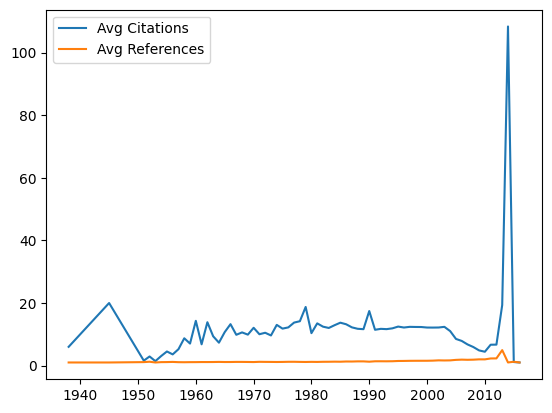

In [108]:
import seaborn as sns
plt.plot(cit_avg['Year'], cit_avg['Count'], label='Avg Citations')
plt.plot(ref_avg['Year'], ref_avg['Count'], label='Avg References')
plt.legend()

We can observe that citations per publications for all years is almost always higher than references per publications. Also we can observe a spike in after 2010 in both the fields.
